In [1]:
import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import matplotlib.pyplot as plt
import contextily as ctx

In [5]:
#bringing in the property valuation and reassessment data created in another notebook
joined_gdf = gpd.read_file('/Users/jacobbasinger/Desktop/uds-project-1/value&assessmentdata.geoJSON')

In [6]:
joined_gdf

,BBB,nta,avland,latitude,zip,stories,avtot,easement,valtype,exland,...,borough_code,block_number,lot_number,tax_year,owner_name,property_address,granted_reduction_amount,tax_class_code,reduction_scaled,geometry
0,1-10-14,Battery Park City-Lower Manhattan,7875000,40.703312,10004,30,38897100,None,AC-TR,0,...,1,10,14,2018,BROAD FINANCIAL CENTE,33 WHITEHALL STREET,1755500,4,0.045132,POINT (-74.01304 40.70331)
1,1-10-15,Battery Park City-Lower Manhattan,406800,40.703517,10004,7,1720350,None,AC-TR,0,...,1,10,15,2018,MSA TWINS LTD,27 WHITEHALL STREET,92350,4,0.053681,POINT (-74.01309 40.70352)
2,1-10-33,Battery Park City-Lower Manhattan,3690450,40.704025,10004,43,35656200,None,AC-TR,0,...,1,10,33,2018,AL STONE GROUND TENAN,8 STONE STREET,2158050,4,0.060524,POINT (-74.01264 40.70403)
3,1-100-1001,Battery Park City-Lower Manhattan,65790,40.711541,10038,23,1183950,None,AC-TR,0,...,1,100,1001,2018,THE BRAUSER GROUP #1,150 NASSAU STREET,247400,4,0.208962,POINT (-74.00603 40.71154)
4,1-100-1201,Battery Park City-Lower Manhattan,5841450,40.711245,10038,76,140023350,None,AC-TR,2759170,...,1,100,1201,2018,FC 8 SPRUCE STREET RE,8 SPRUCE STREET,3949350,2,0.028205,POINT (-74.00540 40.71124)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12341,5-878-133,Todt Hill-Emerson Hill-Heartland Village-Light...,42729,40.600919,10304,3,117596,None,AC-TR,0,...,5,878,133,2018,64 ANNFIELD COURT COR,64 ANNFIELD COURT,7055,1,0.059994,POINT (-74.10604 40.60092)
12342,5-882-180,Todt Hill-Emerson Hill-Heartland Village-Light...,29302,40.602084,10301,1,55381,None,AC-TR,0,...,5,882,180,2018,YOGENDRA R. PATEL,415 WOODDALE AVENUE,3800,1,0.068616,POINT (-74.11064 40.60208)
12343,5-882-85,Todt Hill-Emerson Hill-Heartland Village-Light...,102060,40.603285,10301,2.5,135180,None,AC-TR,5610,...,5,882,85,2018,CARMEN DOLORES CARDO,252 OCEAN TERRACE,8290,1,0.061326,POINT (-74.11206 40.60328)
12344,5-891-99,Todt Hill-Emerson Hill-Heartland Village-Light...,17623,40.587297,10304,1.7,65134,None,AC-TR,1470,...,5,891,99,2018,ANTHONY VITALE,95 WESTENTRY ROAD,1538,1,0.023613,POINT (-74.10482 40.58730)


In [8]:
from cenpy import products

In [38]:
def borough_census(borough):
    df=products.ACS(2017).from_county(borough+', NY', level='tract',
                                        variables=['B19019_001E', 'B01003_001E', '^B02001', 'B03003_003E', 'B25003_001E', 'B25003_002E', 'B25003_003E', 'B09001_001E', 'B01002_001E'])
    df.rename(columns={'B19019_001E':'median_HH_income', 'B01003_001E':'total_population', 'B02001_001E':'total_population_race','B02001_002E':'total_white'}, inplace=True)
    df.rename(columns={'B02001_003E':'total_black', 'B02001_004E':'total_americanindian', 'B02001_005E':'total_asian','B02001_006E':'total_hawaiian'}, inplace=True)
    df.rename(columns={'B02001_007E':'total_otherrace', 'B02001_008E':'total_twoplusraces', 'B03003_003E':'total_hisp_latino','B09001_001E':'pop_under18','B01002_001E':'median_age'}, inplace=True)
    df.drop(columns=['total_population_race', 'B02001_009E', 'B02001_010E'], inplace=True)
    df['pct_renter'] = df['B25003_003E']/df['B25003_001E']*100
    return df

In [39]:
#getting census data for each borough
manhattandf=borough_census('New York County')
brooklyndf=borough_census('King County')
bronxdf=borough_census('Bronx County')
queensdf=borough_census('Queens County')
statendf=borough_census('Richmond County')

/Users/jacobbasinger/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/jacobbasinger/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/jacobbasinger/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `

In [40]:
boroughdfs=[manhattandf, brooklyndf, bronxdf, queensdf, statendf]

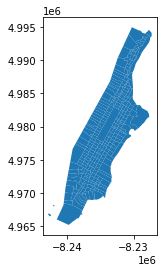

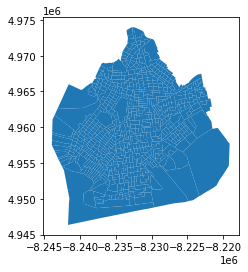

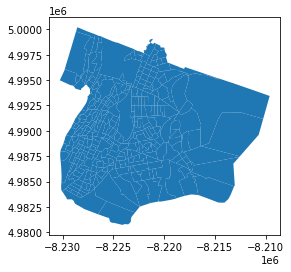

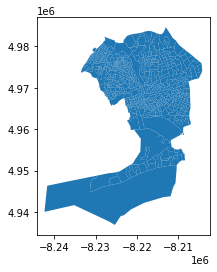

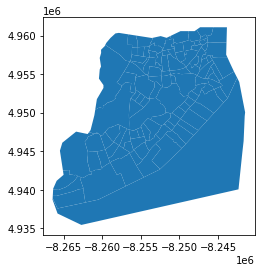

In [41]:
for boro in boroughdfs:
    boro.plot()

In [42]:
censusGdf=pd.concat(boroughdfs)

<AxesSubplot:>

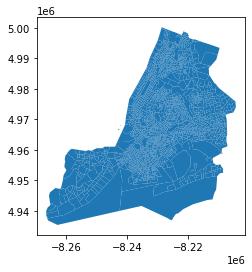

In [43]:
censusGdf.plot()

In [44]:
censusGdf.columns

Index(['GEOID', 'geometry', 'median_age', 'total_population', 'total_white',
       'total_black', 'total_americanindian', 'total_asian', 'total_hawaiian',
       'total_otherrace', 'total_twoplusraces', 'total_hisp_latino',
       'pop_under18', 'median_HH_income', 'B25003_001E', 'B25003_002E',
       'B25003_003E', 'NAME', 'state', 'county', 'tract', 'pct_renter'],
      dtype='object')

In [47]:
censusGdf.drop(columns=['B25003_001E', 'B25003_002E',
       'B25003_003E', 'NAME', 'state'], inplace=True)

In [48]:
censusGdf.head()

,GEOID,geometry,median_age,total_population,total_white,total_black,total_americanindian,total_asian,total_hawaiian,total_otherrace,total_twoplusraces,total_hisp_latino,pop_under18,median_HH_income,county,tract,pct_renter
0,36061031900,"POLYGON ((-8240500.560 4968891.470, -8239842.1...",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,061,031900,NaN
1,36061006900,"POLYGON ((-8239939.840 4972655.360, -8239911.7...",35.2,2568.0,2037.0,53.0,0.0,293.0,0.0,57.0,128.0,161.0,341.0,198636.0,061,006900,60.673235
2,36061010300,"POLYGON ((-8237738.160 4975861.700, -8237700.9...",33.6,1674.0,1130.0,90.0,4.0,324.0,5.0,10.0,111.0,143.0,75.0,98901.0,061,010300,87.114846
3,36061008700,"POLYGON ((-8237672.930 4974484.150, -8237645.8...",35.8,6815.0,5493.0,85.0,0.0,579.0,0.0,478.0,180.0,1165.0,610.0,153350.0,061,008700,65.910868
4,36061011100,"POLYGON ((-8237493.260 4976308.140, -8237467.7...",33.4,5012.0,3111.0,367.0,0.0,1241.0,0.0,110.0,183.0,925.0,440.0,105887.0,061,011100,89.008942


In [50]:
#censusGdf.to_file('/Users/jacobbasinger/Desktop/uds-project-1/fullcensusdata.geoJSON', driver='GeoJSON')

In [51]:
#using a spatial join to bring the point data for property values and reductions from above into the census tract dataset
sjoindf = censusGdf.sjoin(joined_gdf.to_crs("EPSG:3857"),how='left')
sjoindf.head()

,GEOID,geometry,median_age,total_population,total_white,total_black,total_americanindian,total_asian,total_hawaiian,total_otherrace,...,ltdepth,borough_code,block_number,lot_number,tax_year,owner_name,property_address,granted_reduction_amount,tax_class_code,reduction_scaled
0,36061031900,"POLYGON ((-8240500.560 4968891.470, -8239842.1...",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36061006900,"POLYGON ((-8239939.840 4972655.360, -8239911.7...",35.2,2568.0,2037.0,53.0,0.0,293.0,0.0,57.0,...,0,1,601,1201,2018,43 CLARKSON HOLDING L,43 CLARKSON STREET,126550.0,4,0.461020
1,36061006900,"POLYGON ((-8239939.840 4972655.360, -8239911.7...",35.2,2568.0,2037.0,53.0,0.0,293.0,0.0,57.0,...,100,1,602,10,2018,"EQR - 600 WASHINGTON,",600 WASHINGTON STREET,2822750.0,2,0.138082
1,36061006900,"POLYGON ((-8239939.840 4972655.360, -8239911.7...",35.2,2568.0,2037.0,53.0,0.0,293.0,0.0,57.0,...,179,1,602,30,2018,GREENWICH MEWS TENANT,603 WASHINGTON STREET,624700.0,2,0.081473
1,36061006900,"POLYGON ((-8239939.840 4972655.360, -8239911.7...",35.2,2568.0,2037.0,53.0,0.0,293.0,0.0,57.0,...,188,1,602,36,2018,MORTON WEST LLC,611 WASHINGTON STREET,542200.0,4,0.050700


In [52]:
#now each point has an associated census tract, if it intersects one
sjoindf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12595 entries, 0 to 109
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   GEOID                     12595 non-null  object  
 1   geometry                  12595 non-null  geometry
 2   median_age                12494 non-null  float64 
 3   total_population          12595 non-null  float64 
 4   total_white               12595 non-null  float64 
 5   total_black               12595 non-null  float64 
 6   total_americanindian      12595 non-null  float64 
 7   total_asian               12595 non-null  float64 
 8   total_hawaiian            12595 non-null  float64 
 9   total_otherrace           12595 non-null  float64 
 10  total_twoplusraces        12595 non-null  float64 
 11  total_hisp_latino         12595 non-null  float64 
 12  pop_under18               12595 non-null  float64 
 13  median_HH_income          12422 non-null

In [55]:
#making a new df with the total reduction amount granted per tract and joining it to census df
reductionpertract = sjoindf.groupby('tract')[['granted_reduction_amount']].sum()
reductionpertract.rename(columns={'granted_reduction_amount':'total_tract_reduction'}, inplace=True)
censusjoined = censusGdf.join(reductionpertract, on='tract')

In [56]:
#making a new df with the total number of reductions per tract
#adding another column for the total number of property reductions in a census tract
numberreductions = sjoindf.groupby('tract')[['tract']].count()
numberreductions.rename(columns={'tract':'number_reductions'}, inplace=True)
censusjoined = censusjoined.join(numberreductions, on='tract')
censusjoined.head()

,GEOID,geometry,median_age,total_population,total_white,total_black,total_americanindian,total_asian,total_hawaiian,total_otherrace,total_twoplusraces,total_hisp_latino,pop_under18,median_HH_income,county,tract,pct_renter,total_tract_reduction,number_reductions
0,36061031900,"POLYGON ((-8240500.560 4968891.470, -8239842.1...",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,061,031900,NaN,247760.0,7
1,36061006900,"POLYGON ((-8239939.840 4972655.360, -8239911.7...",35.2,2568.0,2037.0,53.0,0.0,293.0,0.0,57.0,128.0,161.0,341.0,198636.0,061,006900,60.673235,12720779.0,31
2,36061010300,"POLYGON ((-8237738.160 4975861.700, -8237700.9...",33.6,1674.0,1130.0,90.0,4.0,324.0,5.0,10.0,111.0,143.0,75.0,98901.0,061,010300,87.114846,10760925.0,27
3,36061008700,"POLYGON ((-8237672.930 4974484.150, -8237645.8...",35.8,6815.0,5493.0,85.0,0.0,579.0,0.0,478.0,180.0,1165.0,610.0,153350.0,061,008700,65.910868,25926957.0,59
4,36061011100,"POLYGON ((-8237493.260 4976308.140, -8237467.7...",33.4,5012.0,3111.0,367.0,0.0,1241.0,0.0,110.0,183.0,925.0,440.0,105887.0,061,011100,89.008942,34944588.0,24


Text(0.5, 1.0, 'Number of Reductions Granted Per Census Tract')

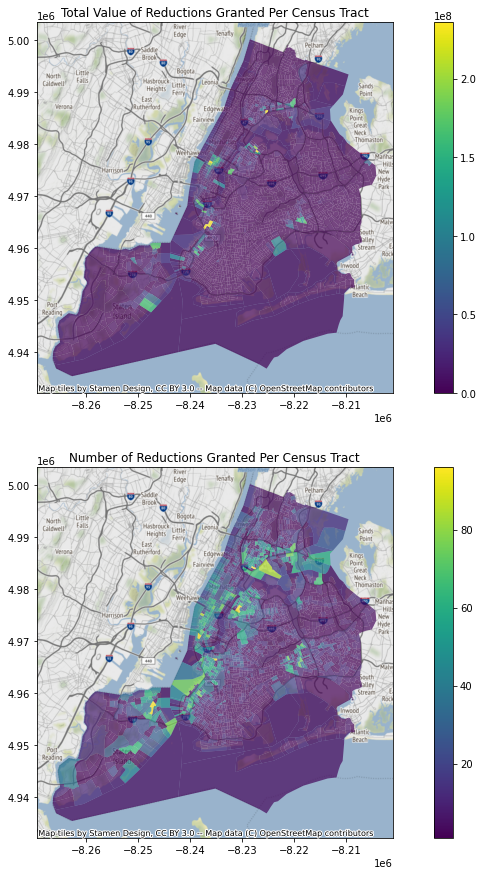

In [59]:
fig, ax = plt.subplots(2, figsize=(15,15))
ax1, ax2 = ax

censusjoined.plot(column='total_tract_reduction', ax=ax1, missing_kwds= dict(color = "grey"), alpha=.7, legend=True)
ctx.add_basemap(ax1)
ax1.set_title("Total Value of Reductions Granted Per Census Tract")

censusjoined.plot(column='number_reductions', ax=ax2, missing_kwds= dict(color = "grey"), alpha=.7, legend=True)
ctx.add_basemap(ax2)
ax2.set_title("Number of Reductions Granted Per Census Tract")

In [60]:
censusjoined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2167 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GEOID                  2167 non-null   object  
 1   geometry               2167 non-null   geometry
 2   median_age             2122 non-null   float64 
 3   total_population       2167 non-null   float64 
 4   total_white            2167 non-null   float64 
 5   total_black            2167 non-null   float64 
 6   total_americanindian   2167 non-null   float64 
 7   total_asian            2167 non-null   float64 
 8   total_hawaiian         2167 non-null   float64 
 9   total_otherrace        2167 non-null   float64 
 10  total_twoplusraces     2167 non-null   float64 
 11  total_hisp_latino      2167 non-null   float64 
 12  pop_under18            2167 non-null   float64 
 13  median_HH_income       2104 non-null   float64 
 14  county                 2167 non-n

In [61]:
censusjoined.columns

Index(['GEOID', 'geometry', 'median_age', 'total_population', 'total_white',
       'total_black', 'total_americanindian', 'total_asian', 'total_hawaiian',
       'total_otherrace', 'total_twoplusraces', 'total_hisp_latino',
       'pop_under18', 'median_HH_income', 'county', 'tract', 'pct_renter',
       'total_tract_reduction', 'number_reductions'],
      dtype='object')

## Machine Learning Section ##

### Assessing the Total Value of Reductions in a Census Tract

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

xvars = ['median_age', 'total_population', 'total_white',
       'total_black', 'total_americanindian', 'total_asian', 'total_hawaiian',
       'total_otherrace', 'total_twoplusraces', 'total_hisp_latino',
       'pop_under18', 'median_HH_income', 'county', 'pct_renter']

yvar = 'total_tract_reduction'

df_to_fit = censusjoined[xvars+[yvar]].dropna()

X_train, X_test, y_train, y_test = train_test_split(df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)

# check we have a reasonable split
print(len(X_train), len(y_train) )
print(len(X_test), len(y_test) )

1578 1578
526 526


In [63]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(len(X_test), len(y_pred))

526 526


In [65]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred))

Mean Absolute Error (MAE): 10759022.338783272
Mean Squared Error (MSE): 625103013572820.9
Root Mean Squared Error (RMSE): 25002060.186569043
Mean Absolute Percentage Error (MAPE): 2.892534422174553e+21
Explained Variance Score: 0.11993967550749374
Max Error: 225374594.92
Mean Squared Log Error: 30.13841399200122
Median Absolute Error: 3945304.61
R^2: 0.11947318250173844
Mean Poisson Deviance: 24581775.332783572


Text(0, 0.5, 'Mean decrease in impurity')

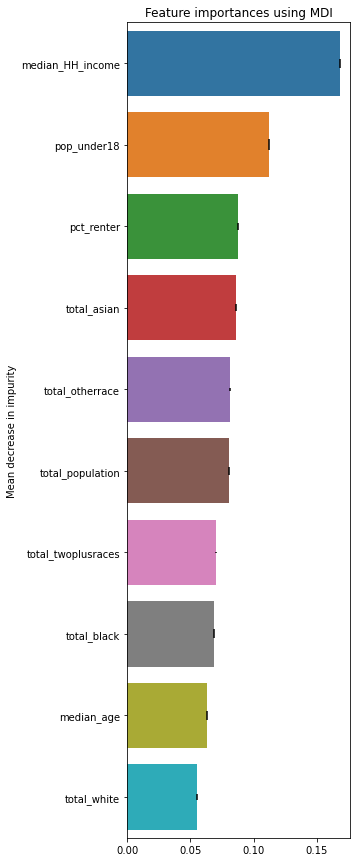

In [66]:
import seaborn as sns

importances = rf.feature_importances_

# convert to a series, and give the index labels from our X_train dataframe
forest_importances = pd.Series(importances, index=X_train.columns)

# get the standard deviations to be able to plot the error bars
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# sort the importances in descending order
forest_importances.sort_values(inplace=True, ascending=False)

# plot
fig, ax = plt.subplots(figsize=(4,15))
sns.barplot(x=forest_importances.values[:10], y=forest_importances.index[:10],yerr=std[:10], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

### Assessing the Total Number of Reductions in a Census Tract

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

xvars = ['median_age', 'total_population', 'total_white',
       'total_black', 'total_americanindian', 'total_asian', 'total_hawaiian',
       'total_otherrace', 'total_twoplusraces', 'total_hisp_latino',
       'pop_under18', 'median_HH_income', 'county', 'pct_renter']

yvar = 'number_reductions'

df_to_fit = censusjoined[xvars+[yvar]].dropna()

X_train, X_test, y_train, y_test = train_test_split(df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)

# check we have a reasonable split
print(len(X_train), len(y_train) )
print(len(X_test), len(y_test) )

1578 1578
526 526


In [68]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(len(X_test), len(y_pred))

526 526


In [69]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred))

Mean Absolute Error (MAE): 10.621482889733839
Mean Squared Error (MSE): 220.90830342205325
Root Mean Squared Error (RMSE): 14.862984337677721
Mean Absolute Percentage Error (MAPE): 2.833890464039115
Explained Variance Score: 0.2311194605652046
Max Error: 80.56
Mean Squared Log Error: 1.1425228377884444
Median Absolute Error: 8.31
R^2: 0.2220896293187371
Mean Poisson Deviance: 12.365239683399754


Text(0, 0.5, 'Mean decrease in impurity')

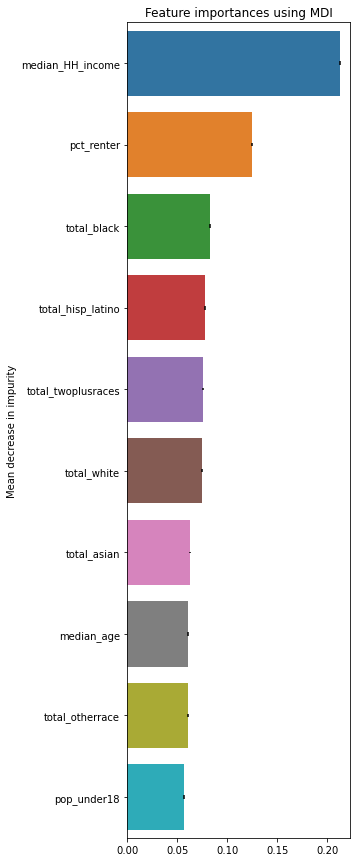

In [70]:
import seaborn as sns

importances = rf.feature_importances_

# convert to a series, and give the index labels from our X_train dataframe
forest_importances = pd.Series(importances, index=X_train.columns)

# get the standard deviations to be able to plot the error bars
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# sort the importances in descending order
forest_importances.sort_values(inplace=True, ascending=False)

# plot
fig, ax = plt.subplots(figsize=(4,15))
sns.barplot(x=forest_importances.values[:10], y=forest_importances.index[:10],yerr=std[:10], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")